In [6]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.metrics import structural_similarity, peak_signal_noise_ratio

def write_csv(name, m):
    sourceFile = open(name, 'w')
    strm = str(m)
    print(strm[1:-1], file = sourceFile)
    sourceFile.close()
    
def show(ims):
    plt.figure(figsize=(5*len(ims),5))
    
    for i in range(len(ims)):
        plt.subplot(1,len(ims),i+1)
        plt.imshow(ims[i])
        
def ssim(im1, im2, data_range=255):
    return structural_similarity(im1, im2, gaussian_weights=True, sigma=1.5, use_sample_covariance=False, data_range=data_range)
  
def psnr(im1, im2, data_range=255):
    return peak_signal_noise_ratio(im1, im2, data_range=255)

In [3]:
gt = np.load('data/gt.npy').astype(int)
pred = np.load('data/pred.npy').astype(int)
print(gt.shape)

(100, 64, 64)


0.39508186247017696
22.14490474046409


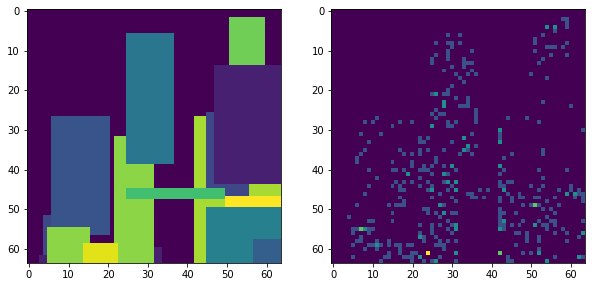

In [5]:
n = 18
print(ssim(gt[n,:,:], pred[n,:,:]))
print(peak_signal_noise_ratio(gt[n,:,:], pred[n,:,:], data_range=255))
show([gt[n,:,:], pred[n,:,:]])

In [8]:
b = gt.shape[0]
mssim = []
mpsnr = []
for i in range(b):
    mssim.append( ssim( gt[i,:,:], pred[i,:,:] ) )
    mpsnr.append( psnr( gt[i,:,:], pred[i,:,:] ) )
    
print(mpsnr)

[24.247642045814374, 20.365332830422386, 19.105647676519155, 26.875252386002373, 21.74880281331543, 21.305327375395922, 19.680677582775992, 23.521465651540034, 24.261548764996267, 19.200770357377852, 19.119128183552384, 17.03761155586106, 18.6796980095022, 21.884815530146152, 19.849326625814683, 20.01197685594033, 22.198061952165308, 21.264645997422257, 22.14490474046409, 19.629985841764817, 18.94859777130382, 23.432712842057043, 22.775223306394867, 20.433695684372495, 21.279382634404627, 16.5887496487294, 20.990288626622405, 21.82270254690705, 18.748239555213438, 23.864063140612032, 23.780388718191713, 20.380138181990443, 19.194715077914278, 18.348585938362397, 21.685667642155998, 21.789653637568836, 21.640982034021093, 21.653009185224434, 24.92852404651176, 17.080957321619103, 19.135243435872987, 18.809469882678748, 18.4230141040073, 21.064636198111508, 22.494495281926014, 21.05751207570869, 21.4995872579159, 18.82176080439036, 22.281547873729195, 19.598703940982688, 23.0094162683421

In [9]:
write_csv('data/ssim.txt', mssim)
write_csv('data/psnr.txt', mpsnr)

In [28]:
# Toy example
dims = (32, 32)

r = np.zeros(dims)
p = np.zeros(dims)

for i in range(dims[0]):
    for j in range(dims[1]):
        r[i,j] = i
        p[i,j] = i+j


ssim(r,p)

0.7433402662472663

In [30]:
# Toy example
dims = (32, 32)

r = np.zeros(dims)
p = np.zeros(dims)

for i in range(dims[0]):
    for j in range(dims[1]):
        r[i,j] = i
        p[i,j] = i+j


ssim(r,p)

0.7433402662472663